In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

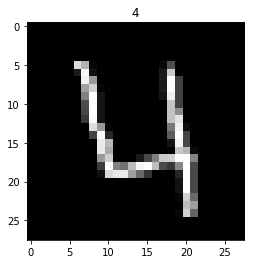

In [7]:
i=3
img=train.iloc[i,1:].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[i,0])
plt.show()

In [8]:
X = train.iloc[:,1:].as_matrix()
y = train.iloc[:,0]
y_ = MultiLabelBinarizer().fit_transform(y.values.reshape(-1,1))
y_


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [11]:
def softmax(preds):
    return np.argmax(preds)

# Logistic Regression

Kaggle: 0.90729

In [ ]:
lr = LogisticRegression(random_state=0,n_jobs=-1)
ovrc = OneVsRestClassifier(lr,n_jobs=-1)
%time ovrc.fit(X, y_)

In [ ]:
ovrc.score(X,y_)

In [ ]:
pred = ovrc.predict_proba(test)
pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':pd.DataFrame(pred).apply(softmax,axis=1)
}).to_csv('./submissions/logreg_ovrc_v1.csv',index=False)


In [ ]:

for i in range(10):
    v0 = ovrc.estimators_[i]
    img=v0.coef_[0].reshape((28,28))
    print(i,np.min(img),np.max(img))
    plt.imshow(img,cmap='bwr',vmin=-.01,vmax=.01)
    #plt.title(i)
    plt.axis('off')
    plt.show()

# Random Forest

Kaggle: 0.94243

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X,y)

In [ ]:
rfc.score(X,y)

In [ ]:
img = rfc.feature_importances_
img=img.reshape((28,28))
print(np.min(img),np.max(img))
plt.imshow(img,cmap='Greys_r',vmin=0,vmax=.018)
plt.title(i)
plt.show()

In [ ]:
pred = rfc.predict(test)
pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':pred
}).to_csv('./submissions/rfc_a_v1.csv',index=False)

# Random Forest One vs All

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

ova_rfc = OneVsRestClassifier(rfc,n_jobs=-1)
%time ova_rfc.fit(X, y_)

In [ ]:
ova_rfc.score(X,y_)

In [ ]:
for i in range(10):
    v0 = ova_rfc.estimators_[i]
    img=v0.feature_importances_.reshape((28,28))
    print(np.min(img),np.max(img))
    plt.axis('off')
    plt.imshow(img,cmap='bwr',vmin=-.01,vmax=.01)
    #plt.title(i)
    plt.show()

In [ ]:
def softmax(preds):
    return np.argmax(preds)

In [ ]:
pred = ova_rfc.predict_proba(test)
pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':pd.DataFrame(pred).apply(softmax,axis=1)
}).to_csv('./submissions/rfc_ova_v4.csv',index=False)

# Keras

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [4]:
batch_size = 128
num_classes = 10
epochs = 40

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
_________________________________________________________________


In [9]:
history = model.fit(X/255,y_,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/40
42000/42000 [==============================] - 11s - loss: 0.2830 - acc: 0.9121    - ETA: 3s - loss: 0.3395
Epoch 2/40
42000/42000 [==============================] - 10s - loss: 0.1154 - acc: 0.9642    
Epoch 3/40
42000/42000 [==============================] - 10s - loss: 0.0803 - acc: 0.9748    
Epoch 4/40
42000/42000 [==============================] - 10s - loss: 0.0638 - acc: 0.9794    - ETA: 0s - loss: 0.0633 - acc: 0
Epoch 5/40
42000/42000 [==============================] - 11s - loss: 0.0508 - acc: 0.9842    
Epoch 6/40
42000/42000 [==============================] - 11s - loss: 0.0427 - acc: 0.9861    
Epoch 7/40
42000/42000 [==============================] - 10s - loss: 0.0370 - acc: 0.9887    
Epoch 8/40
42000/42000 [==============================] - 11s - loss: 0.0322 - acc: 0.9901    
Epoch 9/40
42000/42000 [==============================] - 11s - loss: 0.0284 - acc: 0.9911    
Epoch 10/40
42000/42000 [==============================] - 11s - loss: 0.0278 - acc: 0.9

In [13]:
pred = model.predict(test.values/255)
pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':pd.DataFrame(pred).apply(softmax,axis=1)
}).to_csv('keras_a_v2.csv',index=False)

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [15]:
model.get_layer(index=1).get_weights()[0].shape

(784, 512)

In [16]:
import pydot


def plot(model, to_file):

    graph = pydot.Dot(graph_type='digraph')

    previous_node = None
    written_nodes = []
    n = 1
    for node in model.get_config()['layers']:
        if (node['name'] + str(n)) in written_nodes:
            n += 1
        current_node = pydot.Node(node['name'] + str(n))
        written_nodes.append(node['name'] + str(n))
        graph.add_node(current_node)
        if previous_node:
            graph.add_edge(pydot.Edge(previous_node, current_node))
        previous_node = current_node
    graph.write_png(to_file)

ImportError: No module named 'pydot'

In [17]:
plot(model,'keras.png')

NameError: name 'plot' is not defined

In [18]:
import theano.d3viz as d3v
d3v.d3viz(model.get_output(), 'test.html')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


AttributeError: 'Sequential' object has no attribute 'get_output'

In [19]:
w = model.get_weights()
for i in range(len(w)):
    print(len(w[i]),w[i].shape)

784 (784, 512)
512 (512,)
512 (512, 512)
512 (512,)
512 (512, 10)
10 (10,)


In [ ]:
print(w[2][0].shape)

In [ ]:
(w[0]*w[1]*w[2]).shape

In [ ]:
a = model.get_layer(index=1)

In [ ]:
a.weights

In [ ]:
def kmax(x,i):
    v = model.predict_proba(np.array([0.5]*784).reshape(1,-1),verbose=0)[0]
    return 1 - (v[i]*2 - sum(v))
def kmax0(x):
    return kmax(x,0)
def kmax1(x):
    return kmax(x,1)
def kmax2(x):
    return kmax(x,2)
def kmax3(x):
    return kmax(x,3)
def kmax4(x):
    return kmax(x,4)
def kmax5(x):
    return kmax(x,5)

In [ ]:
def kmax0(x):
    return 1. - model.predict_proba(x.reshape(1,-1),verbose=0)[0][0]

In [ ]:
kmax0(test.loc[6])

In [ ]:
from scipy.optimize import minimize

In [ ]:
model.predict_proba(np.array([0.5]*784).reshape(1,-1),verbose=0)[0]

In [ ]:
r = minimize(kmax0,options={'disp':True},tol=0.00001,method='COBYLA',x0=[0]*784)#np.zeros(784))
img = r.x.reshape(28,28)
print(np.min(img),np.max(img))
plt.imshow(img,cmap='bwr')
plt.title(0)
plt.show()

In [ ]:
r = minimize(kmax1,np.zeros(784))
img = r.x.reshape(28,28)
print(np.min(img),np.max(img))
plt.imshow(img,cmap='bwr')
plt.title(1)
plt.show()

In [ ]:
r = minimize(kmax2,np.zeros(784))
img = r.x.reshape(28,28)
print(np.min(img),np.max(img))
plt.imshow(img,cmap='bwr')
plt.title(2)
plt.show()

In [ ]:
r = minimize(kmax3,np.zeros(784))
img = r.x.reshape(28,28)
print(np.min(img),np.max(img))
plt.imshow(img,cmap='bwr')
plt.title(3)
plt.show()

In [ ]:
r = minimize(kmax4,np.zeros(784))
img = r.x.reshape(28,28)
print(np.min(img),np.max(img))
plt.imshow(img,cmap='bwr')
plt.title(4)
plt.show()

In [ ]:
r = minimize(kmax5,[0.5]*784)#np.zeros(784))
img = r.x.reshape(28,28)
print(np.min(img),np.max(img))
plt.imshow(img,cmap='bwr')
plt.title(5)
plt.show()

In [ ]:
for i in range(len(model.layers)+1):
    l = model.get_layer(index=i)
    if len(l.weights)>0:
        print('==== Layer',i,'====')
        w = l.get_weights()
        print('first element',w[0].shape,':\n',w[0])
        print('second element',w[1].shape,':\n',w[1])
#model.get_layer(index=0).get_weights()

In [ ]:
#r = np.dot(np.dot(a,b),c)


In [ ]:
a = model.get_layer(index=1).get_weights()[0]
a_ = model.get_layer(index=1).get_weights()[1]
b = model.get_layer(index=3).get_weights()[0]
b_ = model.get_layer(index=3).get_weights()[1]
c = model.get_layer(index=5).get_weights()[0]
c_ = model.get_layer(index=5).get_weights()[1]
r = np.dot(np.dot(a-a_,b)-b_,c)-c_
for i in range(10):
    img = r[:,i].reshape(28,28)
    print(np.min(img),np.max(img))
    plt.axis('off')
    plt.imshow(img,cmap='bwr')
    #plt.title(i)
    plt.show()

In [ ]:
train.columns

In [ ]:
for i in range(10):
    s = train[train['label']==i]
    

In [ ]:
m = train.groupby(by='label').mean()/255

In [ ]:
for i in range(10):
    img = m.ix[i].values.reshape(28,28)
    print(np.min(img),np.max(img))
    plt.axis('off')
    plt.imshow(img,cmap='bwr')
    #plt.title(i)
    plt.show()

In [ ]:
batch_size = 128
num_classes = 10
epochs = 15

model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(392, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(196, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(49, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X/255,y_,batch_size=batch_size,epochs=epochs,verbose=1)

In [ ]:
pred = model.predict(test.values/255)
pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':pd.DataFrame(pred).apply(softmax,axis=1)
}).to_csv('./submissions/keras_a_v5.csv',index=False)

# Convolution

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
X = train.iloc[:,1:].as_matrix()
y = train.iloc[:,0]
y_ = MultiLabelBinarizer().fit_transform(y.values.reshape(-1,1))
y_

In [ ]:
img_rows, img_cols = 28,28
if K.image_data_format() == 'channels_first':
    x_train = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train = x_train.astype('float32')
x_train /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

y_train = keras.utils.to_categorical(y, 10)

In [ ]:
model = Sequential()
model.add(keras.layers.normalization.BatchNormalization(input_shape=input_shape))
model.add(Conv2D(49, (5,5), activation='relu', kernel_initializer='he_normal'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#hist = model.fit(x_train, y_train,
#          batch_size=200,
#          epochs=30,
#          verbose=1,validation_split=0.3)
#score = model.evaluate(x_train, y_train, verbose=2)

In [ ]:
if K.image_data_format() == 'channels_first':
    x_test = test.as_matrix().reshape(test.shape[0], 1, img_rows, img_cols)
else:
    x_test = test.as_matrix().reshape(test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255
x_test.shape

In [ ]:
pred = model.predict(x_test)
pd.DataFrame({
    'ImageId':range(1,28001),
    'Label':pd.DataFrame(pred).apply(softmax,axis=1)
}).to_csv('./submissions/keras_conv_v8.csv',index=False)

In [ ]:
from keras.models import load_model
model = load_model('./mnist_model_cnn_v5.dat')
from keras.utils import plot_model
plot_model(model, to_file='mnist_model.png',show_layer_names=True,show_shapes=True)

In [ ]:
model.save(filepath='./mnist_model_cnn_v5.dat',include_optimizer=True)

In [ ]:
pred = pd.DataFrame(model.predict(x_train)).apply(softmax,axis=1)

In [ ]:
a = train.copy()
a['pred'] = pred
a = a[a['label'] != a['pred']]

In [ ]:
len(train)

In [ ]:

for i in range(len(a)):
    plt.title('Prediction: '+str(a.iloc[i,-1])+', Label: '+str(a.iloc[i,0]))
    img = a.iloc[i,1:-1].values.reshape(28,28)
    plt.axis('off')
    plt.imshow(img,cmap='bwr')
    #plt.title(i)
    plt.show()

In [ ]:
len(test)